<a href="https://colab.research.google.com/github/Lizeth058/BIT_BootcampIA/blob/main/Colombia_bankrupy_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Paso 1. Librerias y

In [2]:

import pandas as pd  # Para el manejo de los datos
import numpy as np # Para el manejo de operaciones entre datos, y las columnas
import matplotlib.pyplot as plt # Para el manejo de las graficas
import seaborn as sns # Para el manejo de graficas
from sklearn.model_selection import train_test_split # Para el manejo de los datos de entrenamiento y prueba
from sklearn import tree # Para el manejo de los modelos de arbol de decision
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [3]:
from google.colab import drive # Conectanonos con google drive
drive.mount('/content/drive')
import os    # la librería necesaria para la ruta de la carpeta
os.chdir('/content/drive/MyDrive/Colab Notebooks/bootcamp IA/RETO')
#mostar lista de archivos
os.listdir()

Mounted at /content/drive


['example_submission.csv',
 'Untitled0.ipynb',
 'arbol.png',
 'modelo.png',
 'predictions.csv',
 'test.csv',
 'train.csv',
 'predictions2.csv']

# Componente 1. Comprensión de los datos
## Paso 1. Recopilación de los datos iniciales

In [4]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv') # Se usa para ejecutar la evolución

In [5]:
df = pd.read_csv('train.csv')
df.head()

,index,Ganancia bruta,Ganancia (pérdida),Ingresos de actividades ordinarias,Costo de ventas,Patrimonio total,Total pasivos,Total de activos,Ganancias acumuladas,Pasivos corrientes totales,Activos corrientes totales,Sector,event
0,7620,3.218247e+05,1.322028e+06,3.218247e+05,NaN,9.147743e+06,9.729800e+04,9.245041e+06,2610498.0,9.729800e+04,3207644.0,L,0.0
1,17602,1.665600e+05,-1.603930e+05,1.665600e+05,NaN,3.594330e+05,6.489900e+04,4.243320e+05,-160393.0,6.489900e+04,193787.0,G,0.0
2,18421,2.387397e+06,3.805740e+05,3.686907e+06,1299510.0,2.421259e+06,2.945965e+06,5.367224e+06,461980.0,1.615549e+06,3364490.0,J,0.0
3,779,5.214416e+06,7.228300e+04,6.610757e+07,60893155.0,5.015903e+06,2.482254e+07,2.983844e+07,4415903.0,2.261366e+07,22996533.0,G,1.0
4,6936,2.271980e+05,7.254877e+05,2.271980e+05,NaN,8.062667e+06,2.770852e+06,1.083352e+07,4585023.0,3.307467e+04,257324.0,L,0.0


## Paso 2. Descripción de datos
  ¿Cuántos atributos, cuantos registros?

   13 atributos, 14097 registros

  ¿Cual es el tipo de datos de los atributos?

   1 int64, 1 object 11 float64
   
## Paso 3.Exploración de datos

## Paso 4. Verificación de la calidad

 Nucleos, man , ouilers
   

In [6]:
# Número de atributos y registros
num_atributos = len(df_train.columns)
num_registros = len(df_train)

print(f"Número de atributos: {num_atributos}")
print(f"Número de registros: {num_registros}")



Número de atributos: 13
Número de registros: 14097


In [7]:
df = df_train

##Paso 3. Exploracion de datos

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14097 entries, 0 to 14096
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               14097 non-null  int64  
 1   Ganancia bruta                      14097 non-null  float64
 2   Ganancia (pérdida)                  14097 non-null  float64
 3   Ingresos de actividades ordinarias  14097 non-null  float64
 4   Costo de ventas                     12335 non-null  float64
 5   Patrimonio total                    14097 non-null  float64
 6   Total pasivos                       14097 non-null  float64
 7   Total de activos                    14097 non-null  float64
 8   Ganancias acumuladas                14061 non-null  float64
 9   Pasivos corrientes totales          14059 non-null  float64
 10  Activos corrientes totales          14092 non-null  float64
 11  Sector                              14097

In [9]:
df = df.drop(columns=['Costo de ventas'])

In [10]:
df = df.drop(columns=['Sector'])

In [11]:
df = df.dropna()

In [12]:
df_test = df_test.drop(columns=['Costo de ventas', 'Sector'])


In [13]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6042 entries, 0 to 6041
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               6042 non-null   int64  
 1   Ganancia bruta                      6042 non-null   float64
 2   Ganancia (pérdida)                  6042 non-null   float64
 3   Ingresos de actividades ordinarias  6042 non-null   float64
 4   Patrimonio total                    6042 non-null   float64
 5   Total pasivos                       6042 non-null   float64
 6   Total de activos                    6042 non-null   float64
 7   Ganancias acumuladas                6027 non-null   float64
 8   Pasivos corrientes totales          6034 non-null   float64
 9   Activos corrientes totales          6039 non-null   float64
dtypes: float64(9), int64(1)
memory usage: 472.2 KB


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14023 entries, 0 to 14096
Data columns (total 11 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   index                               14023 non-null  int64  
 1   Ganancia bruta                      14023 non-null  float64
 2   Ganancia (pérdida)                  14023 non-null  float64
 3   Ingresos de actividades ordinarias  14023 non-null  float64
 4   Patrimonio total                    14023 non-null  float64
 5   Total pasivos                       14023 non-null  float64
 6   Total de activos                    14023 non-null  float64
 7   Ganancias acumuladas                14023 non-null  float64
 8   Pasivos corrientes totales          14023 non-null  float64
 9   Activos corrientes totales          14023 non-null  float64
 10  event                               14023 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 1.3 MB


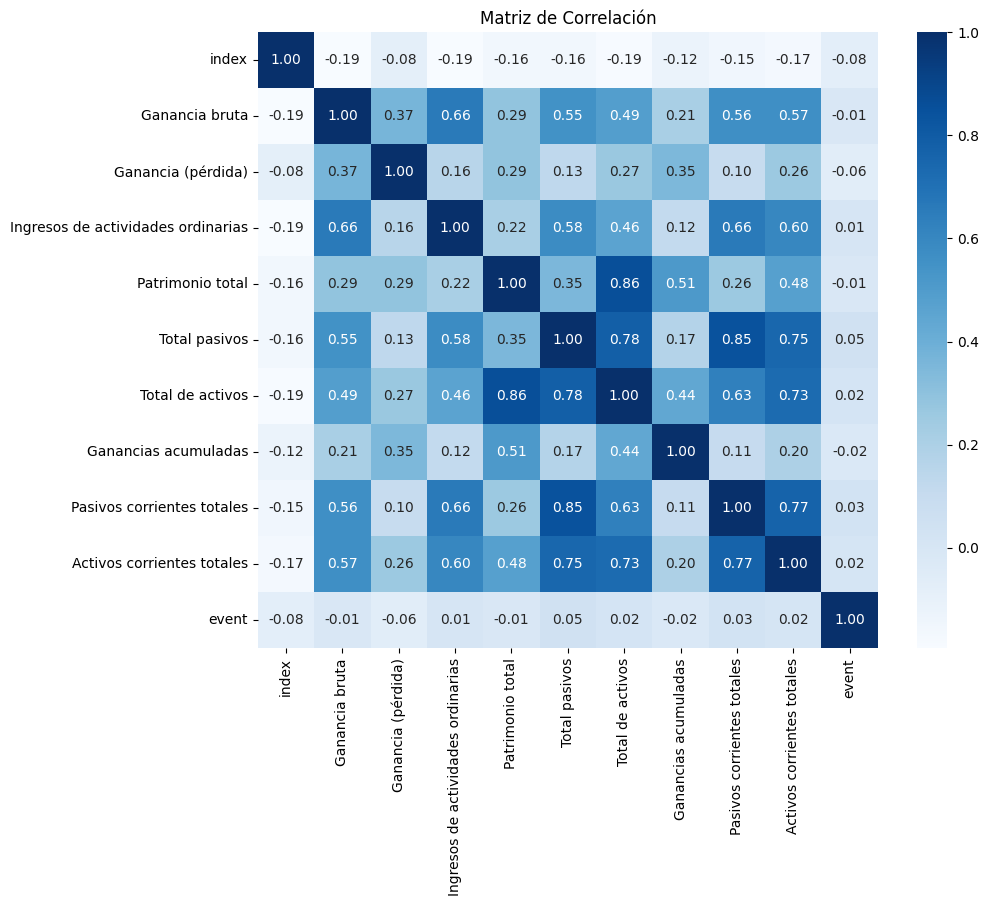

In [15]:
# Calcular la matriz de correlación
corr_matrix = df.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [16]:
df['event'].value_counts()

,count
event,
0.0,13778
1.0,245


In [17]:
Y = df['event']
X = df.drop('event', axis=1)

In [18]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.05, random_state=42)

#Crear el modelo de arbol de dección
modeloDTC = DecisionTreeClassifier()

#Entrar al modelo
modeloDTC.fit(x_train, y_train)


DecisionTreeClassifier()

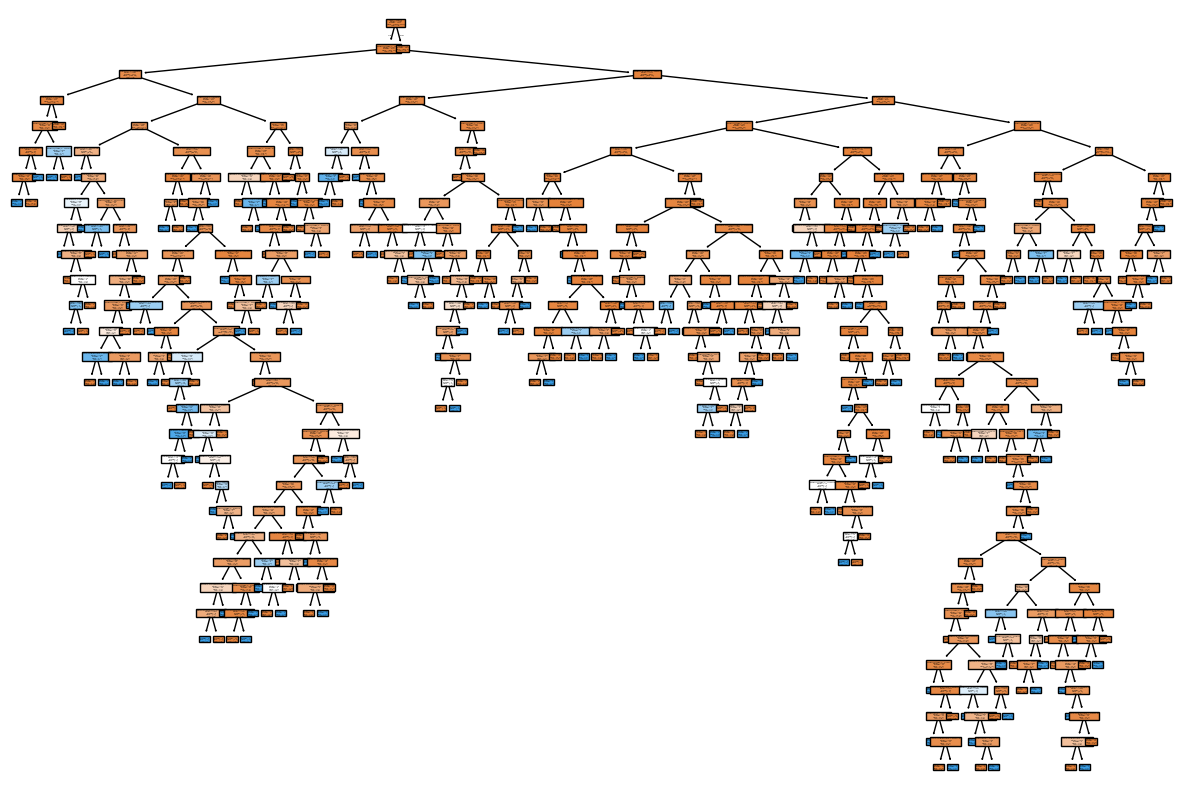

In [19]:
#Crear el modelo de arbol de dección con entropia y PODA
modeloDTC = DecisionTreeClassifier(criterion="entropy")

#Entrar al modelo
modeloDTC.fit(x_train, y_train)

# Hace predicciones
y_pred = modeloDTC.predict(x_test)

# Visualizacion del arbol
y_test_array =  y_test.to_numpy()

plt.figure(figsize=(15,10))
columnas = X.columns.tolist()
arbol = tree.plot_tree(modeloDTC, feature_names= columnas, class_names=['noB','B'], filled=True)
plt.show()

In [20]:
plt.savefig('arbol.png', format = "png")
#

<Figure size 640x480 with 0 Axes>

# Red Neuronal

In [21]:
!pip install tensorflow

In [26]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score
from tensorflow import keras
from keras import layers

In [27]:
modelo = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid') # Para clasificación binaria
])

# Compilar el modelo
modelo.compile(optimizer='adam',  # Puedes elegir otros optimizadores
              loss='binary_crossentropy',  # Usa la pérdida apropiada para tu tarea
              metrics=['accuracy'])  # Añade métricas para monitorear durante el entrenamiento

# Entrenar el modelo
modelo.fit(x_train, y_train, epochs=10, batch_size=32)  # Ajusta épocas y tamaño de lote

# Hacer predicciones
y_pred = modelo.predict(x_test)
y_pred = (y_pred > 0.5).astype(int)  # Convertir probabilidades a etiquetas de clase (0 o 1)

# Calcular las métricas
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir las métricas
print("Métricas para el Modelo Secuencial:")
print(f"  Accuracy: {accuracy}")
print(f"  Recall: {recall}")
print(f"  AUC: {auc}")
print(f"  F1-score: {f1}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9084 - loss: 280773.7500
Epoch 2/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9647 - loss: 22197.7031
Epoch 3/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9618 - loss: 19494.3516
Epoch 4/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9654 - loss: 11078.9512
Epoch 5/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9638 - loss: 12120.5146
Epoch 6/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9680 - loss: 9910.2881
Epoch 7/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 8223.3877
Epoch 8/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9685 - loss: 6774.7192
Epoch 9/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9676 - loss: 5784.2988
Epoch 10/10
417/417 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9680 - loss: 9744.9170
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Métricas para el Modelo Secuencial:
  Accuracy: 0.9743589743589743
  Recall

In [28]:
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 128)                 │           1,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,189 (114.02 KB)

 Trainable params: 9,729 (38.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 19,460 (76.02 KB)

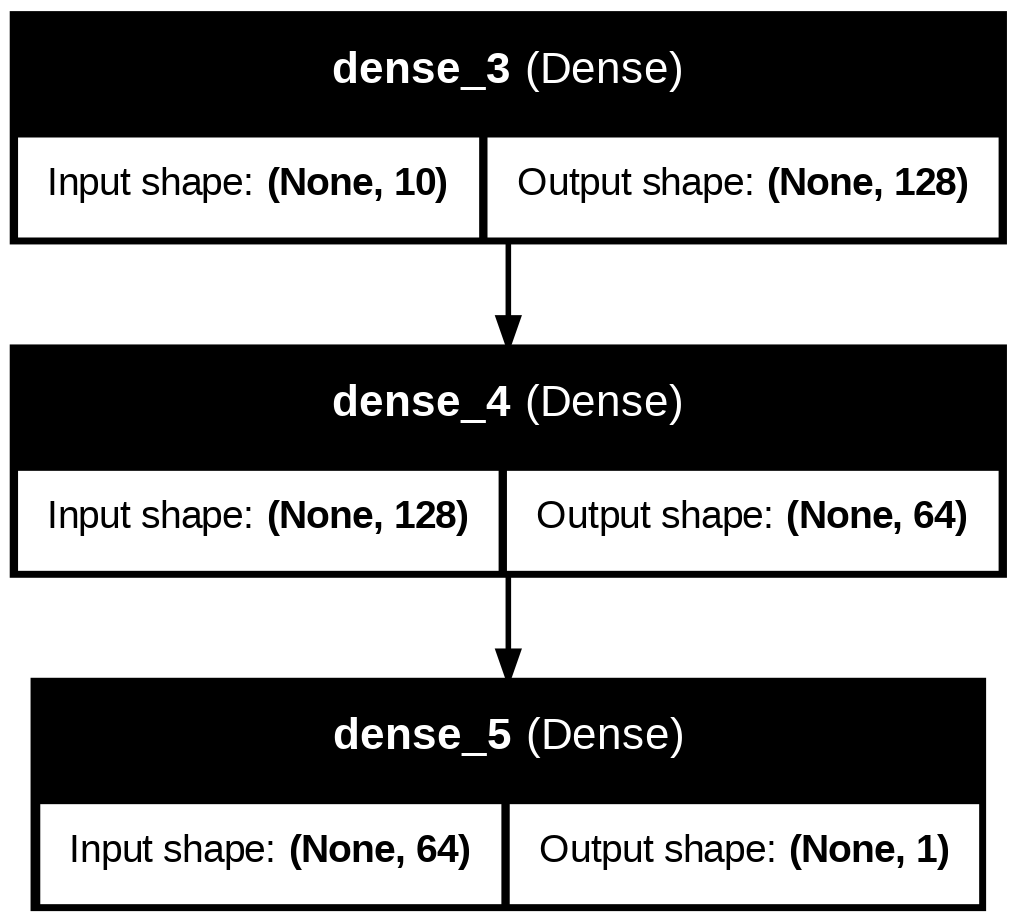

<Figure size 800x500 with 0 Axes>

In [30]:
from keras.utils import plot_model
plt.figure(figsize=(8, 5))
plot_model(modelo, to_file='modelo.png', show_shapes=True, show_layer_names=True)

In [31]:
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
history = modelo.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9729 - loss: 4253.2402 - val_accuracy: 0.9430 - val_loss: 2203.8660
Epoch 2/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9677 - loss: 3721.2249 - val_accuracy: 0.9812 - val_loss: 4974.5757
Epoch 3/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9699 - loss: 2954.4060 - val_accuracy: 0.9696 - val_loss: 1851.4805
Epoch 4/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9729 - loss: 1650.0012 - val_accuracy: 0.9696 - val_loss: 1112.5857
Epoch 5/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9665 - loss: 1365.9465 - val_accuracy: 0.9812 - val_loss: 6416.2197
Epoch 6/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9760 - loss: 2634.5713 - val_accuracy: 0.9809 - val_loss: 3450.6311
Epoch 7/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 2525.2549 - val_accuracy: 0.9516 - val_loss: 1311.0863
Epoch 8/10
333/333 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy

<Axes: >

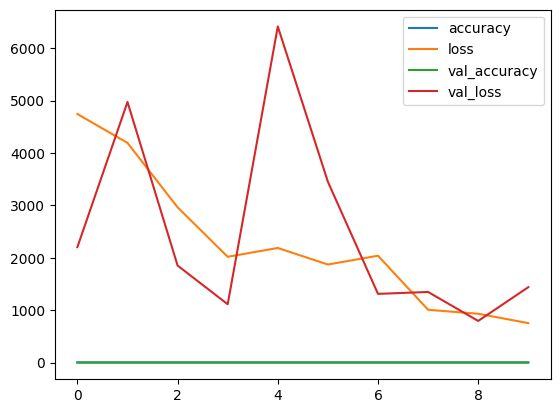

In [33]:
pd.DataFrame(history.history).plot()

In [34]:
y_pred_sigmoide =modelo.predict(df_test)


189/189 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [35]:
y_pred_binary = (y_pred_sigmoide > 0.5).astype(int)

In [36]:
y_pred = pd.DataFrame(y_pred_binary.flatten() ,columns=['y_pred'])

In [37]:
y_pred

,y_pred
0,0
1,0
2,0
3,0
4,0
...,...
6037,0
6038,0
6039,0
6040,0


In [38]:
df_index = df_test['index']

In [39]:
predictions = {
    'index' : df_test['index'],
    'prediction' : y_pred['y_pred']
}

df_predictions = pd.DataFrame(predictions)

In [40]:
df_predictions.to_csv('predictions.csv', index=False)